# Exploratory data analysis of the Titanic dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

palette = sns.husl_palette(s=1)
sns.set(style='whitegrid', palette=palette, context='talk')

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
train.shape

(891, 12)

### Calculate the number of surviving/non-surviving passengers and display it as a bar plot.

In [5]:
survived = train.groupby('Survived')[['PassengerId']].count().rename(index={0:'Dead', 1:'Survived'})
# double brackets make it a dataframe rather than series, looks nicer (pretends to select several columns)
survived

,PassengerId
Survived,
Dead,549
Survived,342


Text(0.5, 0, '')

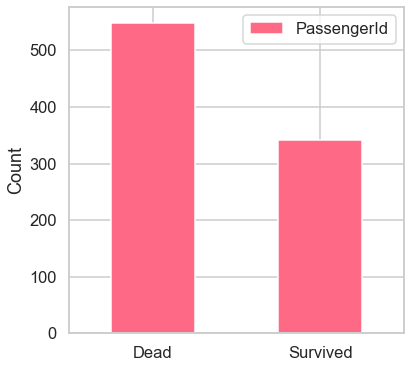

In [6]:
ax = survived.plot.bar(rot=0, figsize=(6,6))
ax.set_ylabel('Count')
ax.set_xlabel('')

### Calculate the proportion of surviving 1st class passengers with regards to the total number of 1st class passengers.

In [7]:
firstclass = train[train['Pclass'] == 1]
firstclass.groupby('Survived')['PassengerId'].count()[1] / firstclass.shape[0]

0.6296296296296297

### Create a bar plot with separate bars for male/female passengers and 1st/2nd/3rd class passengers.

In [8]:
#train.groupby('Pclass')
passengers = train.groupby(['Pclass', 'Sex'])['PassengerId'].count()
passengers

Pclass  Sex   
1       female     94
        male      122
2       female     76
        male      108
3       female    144
        male      347
Name: PassengerId, dtype: int64

Text(0.5, 0, 'Passenger class')

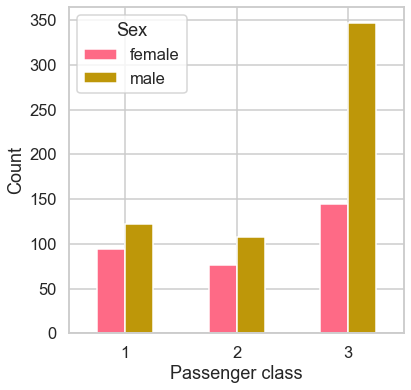

In [18]:
ax = train.groupby(['Pclass', 'Sex'])['PassengerId'].count().unstack(1).plot.bar(rot=0, figsize=(6,6))

ax.set_ylabel('Count')
ax.set_xlabel('Passenger class')

### Much shorter version without grouping and stacking using seaborn.countplot()

Text(0.5, 0, 'Passenger class')

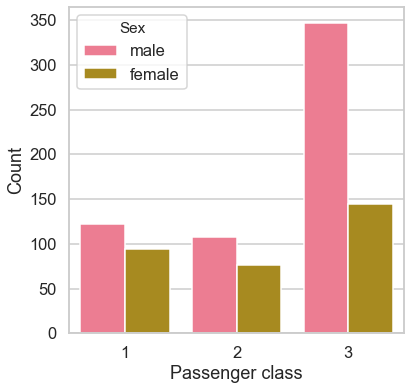

In [10]:
ax = plt.figure(figsize=(6,6))
ax = sns.countplot(x='Pclass', hue='Sex', data=train)

ax.set_ylabel('Count')
ax.set_xlabel('Passenger class')

AttributeError: 'FacetGrid' object has no attribute 'set_title'

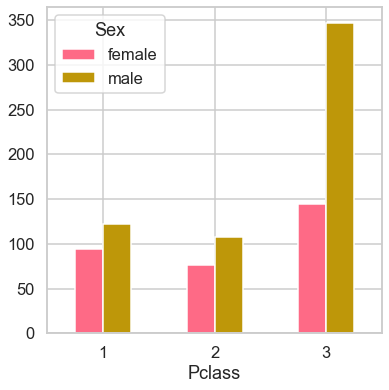

In [22]:
#fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(14,8))
train.groupby(['Pclass', 'Sex'])['PassengerId'].count().unstack(1).plot.bar(rot=0, figsize=(6,6))
ax.set_title('Pandas DataFrame.plot.bar', weight='bold', pad=12)


sns.catplot(x="Parch", hue="Survived", col="Sex",data=train, kind="count")
ax.set_title('Seaborn.catplot', weight='bold', pad=12)
plt.legend()

### Add additional information with separation in two graphs
Uses FacetGrids


<Figure size 864x432 with 0 Axes>

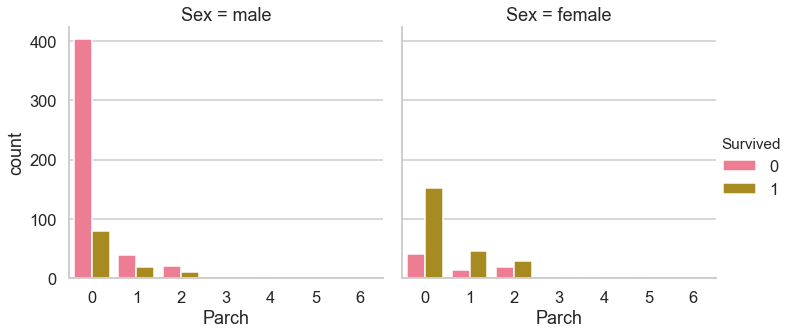

In [14]:
g = plt.figure(figsize=(12,6))
g = sns.catplot(x="Parch", hue="Survived", col="Sex",data=train, kind="count")

### Create a histogram showing the age distribution of passengers. Compare surviving/non-surviving passengers.

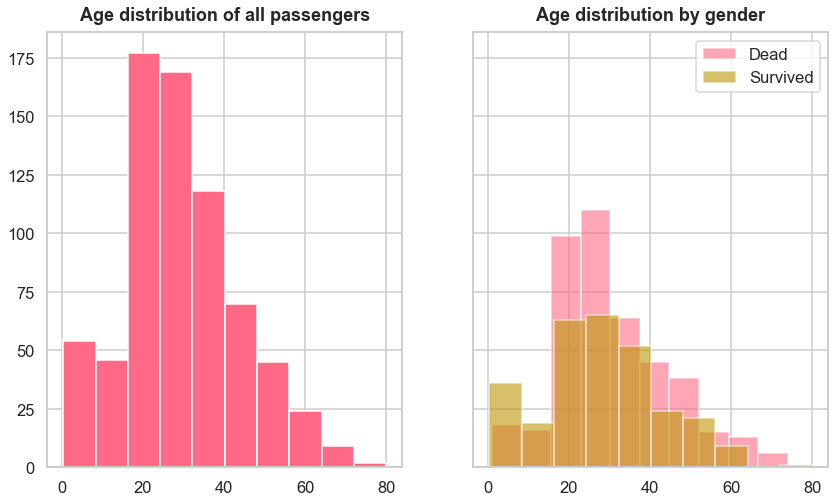

In [17]:
fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(14,8))

ax = axs[0]
ax.hist(train['Age'])
ax.set_title('Age distribution of all passengers', weight='bold', pad=12)

ax = axs[1]
ax.hist(train[train['Survived'] == 0]['Age'], alpha=0.6, label='Dead')
ax.hist(train[train['Survived'] == 1]['Age'], alpha=0.6, label='Survived')
ax.set_title('Age distribution by gender', weight='bold', pad=12)
plt.legend()

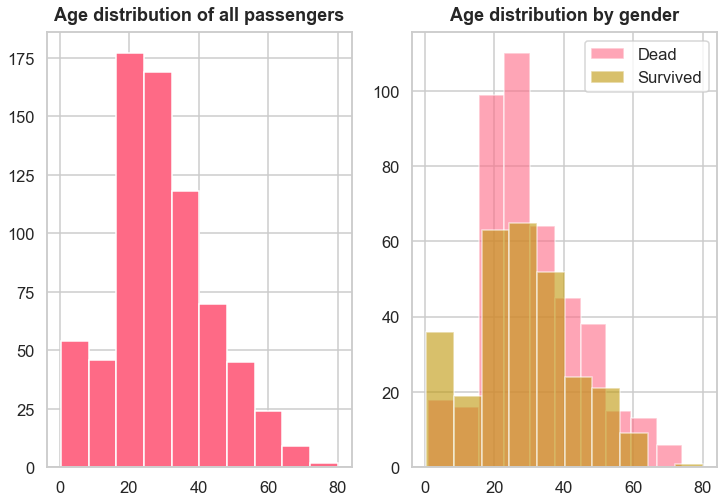

In [16]:
#same stuff using subplot instead of subplots (different notation)
plt.figure(figsize=(12,8))
ax1 = plt.subplot(1,2,1)
ax1.hist(train['Age'])
ax1.set_title('Age distribution of all passengers', weight='bold', pad=12)

ax2 = plt.subplot(1,2,2)
ax2.hist(train[train['Survived'] == 0]['Age'], alpha=0.6, label='Dead')
ax2.hist(train[train['Survived'] == 1]['Age'], alpha=0.6, label='Survived')
ax2.set_title('Age distribution by gender', weight='bold', pad=12)
plt.legend()

#### Using seaborn.distplot()

In [ ]:
plt.figure(figsize=(12,8))

ax = sns.distplot(train[train['Survived'] == 0]['Age'], label="Dead")
sns.distplot(train[train['Survived'] == 1]['Age'], label="Survived")

ax.set_title('Age distribution by gender', weight='bold', pad=12)
ax.set_ylabel('Count')
plt.legend()


### Calculate the average age for survived and drowned passengers separately.

In [ ]:
train.groupby('Survived')['Age'].mean()

In [ ]:
# use .describe to get more information 
train.groupby('Survived')['Age'].describe()

### Replace missing age values by the mean age.

In [ ]:
train['Age_fixed'] = train['Age'].fillna(train['Age'].mean())
train.head(8)

# if we wanted to replace the age column with the new column, we could use 
# train['Age'].fillna(train['Age'].mean(), inplace=True)


### Create a table counting the number of surviving/dead passengers separately for 1st/2nd/3rd class and male/female.

In [ ]:
passengers_count = train.groupby(['Survived', 'Pclass', 'Sex'])['PassengerId'].count()
passengers_count = passengers_count.unstack([0]).rename(columns={0:'dead', 1:'survived'})
passengers_count

### Count how many people per ticket and calculate fare per passenger

In [ ]:
ppticket = train.groupby('Ticket')['PassengerId'].count().to_dict() # number of passengers for each ticket as dict
train['pass_ticket'] = train['Ticket'].replace(ppticket)
train['fare_per_pass'] = train['Fare'] / train['pass_ticket'] # fare per passenger

In [ ]:
plt.figure(figsize=(12,8))

ax1 = plt.subplot(1,2,1)
fare_survive = train.groupby('Pclass')[['Pclass', 'fare_per_pass', 'Survived']].mean()
ax1 = sns.scatterplot(x='fare_per_pass', y='Survived', data=fare_survive)
plt.xlim(0, 50)
plt.ylim(0, 1) 

ax2 = plt.subplot(1,2,2)
ax2 = sns.scatterplot(x='Pclass', y='Survived', data=fare_survive)
plt.xlim(0, 5)
plt.ylim(0, 1) 

In [ ]:
plt.figure(figsize=(12,8))
sns.catplot(x='Pclass', y='fare_per_pass', hue='Embarked', kind='strip', data=train, jitter=0.4, height=8, aspect=1.5)


## Does group size matter?

In [ ]:
ax = plt.figure(figsize=(6,6))
ax = sns.countplot(x='pass_ticket', hue='Survived', data=train)

ax.set_ylabel('Survived')
ax.set_xlabel('Passengers per Ticket')

In [ ]:
group_plot=train.groupby(['pass_ticket', 'Sex'])['Survived'].mean().reset_index()
family_plot = train.groupby(['family', 'Sex'])['Survived'].mean().reset_index()

plt.figure(figsize=(12,8))

ax1 = plt.subplot(1,2,1)
ax1 = sns.barplot(x='pass_ticket', y='Survived', hue='Sex', data=group_plot)
plt.xlim(-1,7)
plt.ylim(0,1)
plt.hlines(y=train.groupby('Sex')['Survived'].mean()['female'], xmin=-1, xmax=7, color=palette[0])
plt.hlines(y=train.groupby('Sex')['Survived'].mean()['male'], xmin=-1, xmax=7, color=palette[1])
plt.hlines(y=train['Survived'].mean(), xmin=-1, xmax=7, color='grey')
#train.head()xmin, xmax

ax2 = plt.subplot(1,2,2)
ax2 = sns.barplot(x='family', y='Survived', hue='Sex', data=family_plot)
plt.xlim(-1,8)
plt.ylim(0,1)
plt.hlines(y=train.groupby('Sex')['Survived'].mean()['female'], xmin=-1, xmax=8, color=palette[0])
plt.hlines(y=train.groupby('Sex')['Survived'].mean()['male'], xmin=-1, xmax=8, color=palette[1])
plt.hlines(y=train['Survived'].mean(), xmin=-1, xmax=8, color='grey')

In [ ]:
group_plot

## How about family?

In [ ]:
train['family'] = train['SibSp'] + train['Parch'] + 1

In [ ]:
train.groupby(['family', 'Sex'])['Survived'].mean().unstack(1).plot.bar(figsize=(12,8), rot=0)
plt.xlim(-1,8)
plt.ylim(0,1)
plt.hlines(y=train.groupby('Sex')['Survived'].mean()['female'], xmin=-1, xmax=8, color=palette[0])
plt.hlines(y=train.groupby('Sex')['Survived'].mean()['male'], xmin=-1, xmax=8, color=palette[1])
plt.hlines(y=train['Survived'].mean(), xmin=-1, xmax=8, color='grey')
#train.head()xmin, xmax

In [ ]:
train[train['pass_ticket'] == 7]